<a href="https://colab.research.google.com/github/andi23/Custlr-AI/blob/Zobaid_branch/Coursera/sarcasm_with_keras_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Loading and Viewing the Sample Dataset**

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
path = '/content/gdrive/My Drive/Colab Notebooks/Sarcasm_Dataset/'
sar_acc = pd.read_json(path+ 'Sarcasm_Headlines_Dataset.json',lines=True)
import re
sar_acc['source'] = sar_acc['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
sar_acc.head()

,article_link,headline,is_sarcastic,source
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret 'black code' for minority shoppers,0,huffingtonpost
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0,huffingtonpost
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son's web series closest thing she will have to grandchild,1,theonion
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1,theonion
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j.k. rowling wishes snape happy birthday in the most magical way,0,huffingtonpost


**Summary statistics of the Dataset**

In [7]:
!pip install plotly==3.10.0

     |████████████████████████████████| 41.5MB 73kB/s 
ERROR: cufflinks 0.17.0 has requirement plotly>=4.1.1, but you'll have plotly 3.10.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [3]:
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

sar_acc_tar = sar_acc['is_sarcastic'].value_counts()
labels = ['Acclaim', 'Sarcastic']
sizes = (np.array((sar_acc_tar / sar_acc_tar.sum())*100))
colors = ['#58D68D', '#9B59B6']

trace = go.Pie(labels=labels, values=sizes, opacity = 0.8, hoverinfo='label+percent',
               marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))
layout = go.Layout(
    title='Sarcastic Vs Acclaim'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="Sa_Ac")

**Frequent Occuring word (unclean) in Headlines**

In [4]:
all_words = sar_acc['headline'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Viridis',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Frequent Occuring word (unclean) in Headlines'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='basic-bar')

In [0]:
sar_det = sar_acc[sar_acc.is_sarcastic==1]
sar_det.reset_index(drop=True, inplace=True)
acc_det = sar_acc[sar_acc.is_sarcastic==0]
acc_det.reset_index(drop=True, inplace=True)

# Tokenizing the Headlines of Sarcasm
sar_news = []
for rows in range(0, sar_det.shape[0]):
    head_txt = sar_det.headline[rows]
    head_txt = head_txt.split(" ")
    sar_news.append(head_txt)

#Converting into single list for Sarcasm
import itertools
sar_list = list(itertools.chain(*sar_news))

# Tokenizing the Headlines of Acclaim
acc_news = []
for rows in range(0, acc_det.shape[0]):
    head_txt = acc_det.headline[rows]
    head_txt = head_txt.split(" ")
    acc_news.append(head_txt)
    
#Converting into single list for Acclaim
acc_list = list(itertools.chain(*acc_news))

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
stopwords = nltk.corpus.stopwords.words('english')
sar_list_restp = [word for word in sar_list if word.lower() not in stopwords]
acc_list_restp = [word for word in acc_list if word.lower() not in stopwords]

print("Length of original Sarcasm list: {0} words\n"
      "Length of Sarcasm list after stopwords removal: {1} words"
      .format(len(sar_list), len(sar_list_restp)))

print("=="*46)

print("Length of original Acclaim list: {0} words\n"
      "Length of Acclaim list after stopwords removal: {1} words"
      .format(len(acc_list), len(acc_list_restp)))

Length of original Sarcasm list: 115898 words
Length of Sarcasm list after stopwords removal: 87458 words
Length of original Acclaim list: 147128 words
Length of Acclaim list after stopwords removal: 103525 words


**Top 30 Occuring words after removing Stopwords from Headlines - Sarcasm Vs Acclaim**

In [0]:
#Data cleaning for getting top 30
from collections import Counter
sar_cnt = Counter(sar_list_restp)
acc_cnt = Counter(acc_list_restp)

#Dictonary to Dataframe
sar_cnt_df = pd.DataFrame(list(sar_cnt.items()), columns = ['Words', 'Freq'])
sar_cnt_df = sar_cnt_df.sort_values(by=['Freq'], ascending=False)
acc_cnt_df = pd.DataFrame(list(acc_cnt.items()), columns = ['Words', 'Freq'])
acc_cnt_df = acc_cnt_df.sort_values(by=['Freq'], ascending=False)

#Top 30
sar_cnt_df_30 = sar_cnt_df.head(30)
acc_cnt_df_30 = acc_cnt_df.head(30)

In [12]:
#Plotting the top 30 Sarcasm Vs Acclaim
from plotly import tools
sar_tr  = go.Bar(
    x=sar_cnt_df_30['Freq'],
    y=sar_cnt_df_30['Words'],
    name='Sarcasm',
    marker=dict(
        color='rgba(155, 89, 182, 0.6)',
        line=dict(
            color='rgba(155, 89, 182, 1.0)',
            width=.3,
        )
    ),
    orientation='h',
    opacity=0.6
)

acc_tr  = go.Bar(
    x=acc_cnt_df_30['Freq'],
    y=acc_cnt_df_30['Words'],
    name='Acclaim',
    marker=dict(
        color='rgba(88, 214, 141, 0.6)',
        line=dict(
            color='rgba(88, 214, 141, 1.0)',
            width=.3,
        )
    ),
    orientation='h',
    opacity=0.6
)

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('Top 30 Most occuring words in Sarcasm Headlines',
                                                          'Top 30 Most occuring words in Acclaim Headlines'))

fig.append_trace(sar_tr, 1, 1)
fig.append_trace(acc_tr, 2, 1)


fig['layout'].update(height=1200, width=800)

iplot(fig, filename='sar_vs_acc')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



**Example of SnowballStemmer**

In [13]:
stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)

print("The stemmed form of learning is: {}".format(stemmer.stem("learning")))
print("The stemmed form of learns is: {}".format(stemmer.stem("learns")))
print("The stemmed form of learn is: {}".format(stemmer.stem("learn")))
print("=="*46)
print("The stemmed form of leaves is: {}".format(stemmer.stem("leaves")))
print("=="*46)

The stemmed form of learning is: learn
The stemmed form of learns is: learn
The stemmed form of learn is: learn
The stemmed form of leaves is: leav


In [15]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
print("The lemmatized form of leaves is: {}".format(lemm.lemmatize("leaves")))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
The lemmatized form of leaves is: leaf


In [0]:
#Sarcasm headline after Lemmatization
sar_wost_lem = []
for batch in sar_news:
    sar_list_restp = [word for word in batch if word.lower() not in stopwords]
    lemm = WordNetLemmatizer()
    sar_list_lemm =  [lemm.lemmatize(word) for word in sar_list_restp]
    sar_wost_lem.append(sar_list_lemm)

#Acclaim headline after Lemmatization
acc_wost_lem = []
for batch in acc_news:
    acc_list_restp = [word for word in batch if word.lower() not in stopwords]
    lemm = WordNetLemmatizer()
    acc_list_lemm =  [lemm.lemmatize(word) for word in acc_list_restp]
    acc_wost_lem.append(sar_list_lemm)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vec = []
for block in sar_wost_lem:
    vectorizer = CountVectorizer(min_df=0)
    sentence_transform = vectorizer.fit_transform(block)
    vec.append(sentence_transform)
    
print("The features are:\n {}".format(vectorizer.get_feature_names()))
print("\nThe vectorized array looks like:\n {}".format(sentence_transform.toarray()))

The features are:
 ['christmas', 'francis', 'got', 'pope', 'sweater', 'vestment', 'wearing']

The vectorized array looks like:
 [[0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]]


In [18]:
# Converting all sarcasm keywords to single list after lemmatization
from matplotlib import pyplot as plt
%matplotlib inline
sar_list_wd = list(itertools.chain(*sar_wost_lem))
from wordcloud import WordCloud
sar_cloud = WordCloud(background_color='black', width=20000,height=10000).\
                generate(" ".join(sar_list_wd))
plt.imshow(sar_cloud)
plt.axis('off')
plt.show()

KeyboardInterrupt: ignored

**WordCloud of Acclaim Headlines after Lemmatisation**

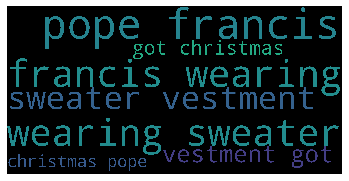

In [19]:
acc_list_wd = list(itertools.chain(*acc_wost_lem))
acc_cloud = WordCloud(background_color='black', width=20000,height=10000).\
                generate(" ".join(acc_list_wd))
plt.imshow(acc_cloud)
plt.axis('off')
plt.show()

In [20]:
sar_wost_lem_df = pd.DataFrame({'sarcasm':sar_wost_lem})
acc_wost_lem_df = pd.DataFrame({'acclaim':acc_wost_lem})

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    ngrams = zip(*[text[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

#Plotting the Bigram plot
from collections import defaultdict
freq_dict = defaultdict(int)
for sent in sar_wost_lem_df["sarcasm"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
sar_2 = horizontal_bar_chart(fd_sorted.head(50), '#9B59B6')


freq_dict = defaultdict(int)
for sent in acc_wost_lem_df["acclaim"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
acc_2 = horizontal_bar_chart(fd_sorted.head(50), '#58D68D')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of Sarcasm Headlines", 
                                          "Frequent bigrams of Acclaim Headlines"])
fig.append_trace(sar_2, 1, 1)
fig.append_trace(acc_2, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots Sarcasm Vs Acclaim after removing Stopwords")
iplot(fig, filename='word-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [21]:
#Plotting the Trigram plot
from collections import defaultdict
freq_dict = defaultdict(int)
for sent in sar_wost_lem_df["sarcasm"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
sar_2 = horizontal_bar_chart(fd_sorted.head(50), '#9B59B6')


freq_dict = defaultdict(int)
for sent in acc_wost_lem_df["acclaim"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
acc_2 = horizontal_bar_chart(fd_sorted.head(50), '#58D68D')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent Trigrams of Sarcasm Headlines", 
                                          "Frequent Trigrams of Acclaim Headlines"])
fig.append_trace(sar_2, 1, 1)
fig.append_trace(acc_2, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Trigram Plots Sarcasm Vs Acclaim after removing Stopwords")
iplot(fig, filename='word-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



**Meta Features**  

Thanks to Sudalairajkumar for the awesome kernel which taught me about the meta features.

Link for the kernel:
https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc

In [0]:
from wordcloud import STOPWORDS
import string
## Number of words in the text ##
sar_acc["num_words"] = sar_acc["headline"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
sar_acc["num_unique_words"] = sar_acc["headline"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
sar_acc["num_chars"] = sar_acc["headline"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
sar_acc["num_stopwords"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
sar_acc["num_punctuations"] =sar_acc['headline'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
sar_acc["num_words_upper"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
sar_acc["num_words_title"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
sar_acc["mean_word_len"] = sar_acc["headline"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

Now let us see how these meta features are distributed between both Sarcasm and Acclaim headlines.

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



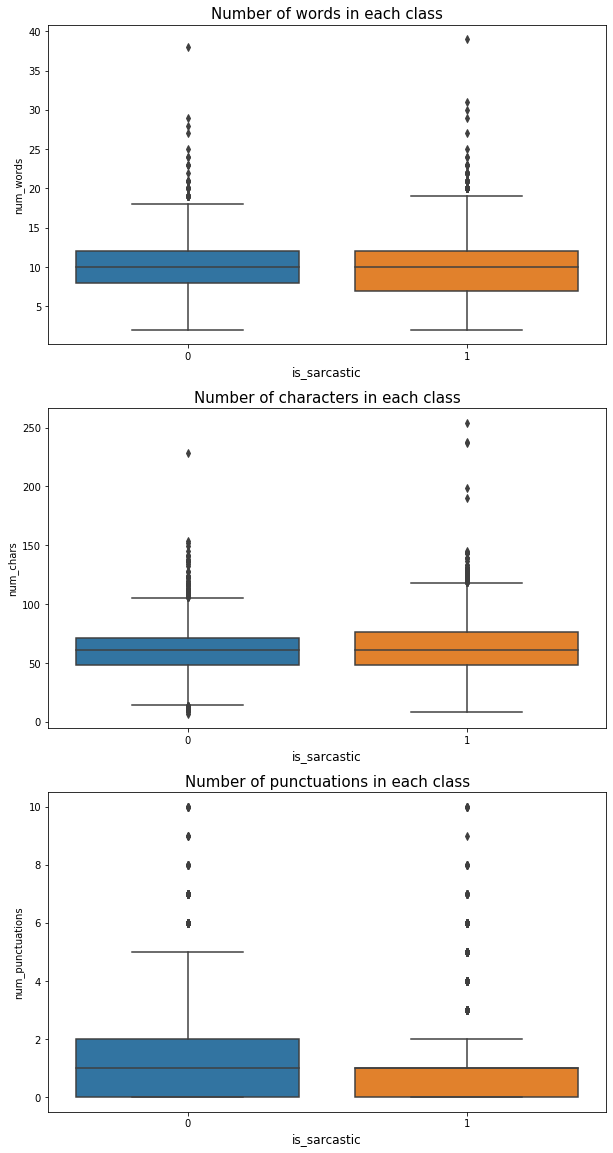

In [23]:
## Truncate some extreme values for better visuals ##
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

sar_acc['num_words'].loc[sar_acc['num_words']>60] = 60 #truncation for better visuals
sar_acc['num_punctuations'].loc[sar_acc['num_punctuations']>10] = 10 #truncation for better visuals
sar_acc['num_chars'].loc[sar_acc['num_chars']>350] = 350 #truncation for better visuals

sar_acc['num_words'].loc[sar_acc['num_words']>60] = 60 #truncation for better visuals
sar_acc['num_punctuations'].loc[sar_acc['num_punctuations']>10] = 10 #truncation for better visuals
sar_acc['num_chars'].loc[sar_acc['num_chars']>350] = 350 #truncation for better visuals

f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.boxplot(x='is_sarcastic', y='num_words', data=sar_acc, ax=axes[0])
axes[0].set_xlabel('is_sarcastic', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.boxplot(x='is_sarcastic', y='num_chars', data=sar_acc, ax=axes[1])
axes[1].set_xlabel('is_sarcastic', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.boxplot(x='is_sarcastic', y='num_punctuations', data=sar_acc, ax=axes[2])
axes[2].set_xlabel('is_sarcastic', fontsize=12)
#plt.ylabel('Number of punctuations in text', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()


**Time to Play with Keras**  
**1. Data preparation for Model building**  
For any model, first the data needs to be prepared in a suitable format. Here, for our keras model we need to create the input and output vectors and then preprocess the lables.

In [0]:
#Getting X and Y ready
from sklearn.preprocessing import LabelEncoder
X = sar_acc.headline
Y = sar_acc.is_sarcastic
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

**2. Split into Training and Test data**

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

**3. Processing the data for the model**  
* Tokenize the data and convert the text to sequences.
* Add padding to ensure that all the sequences have the same shape.
* There are many ways of taking the max_len and here an arbitrary length of 150 is chosen

In [26]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

Using TensorFlow backend.


**4. Defining the RNN structure for the model**

In [0]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(512,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

**5. Compiling the model**

In [28]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 512)               33280     
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
______

**6. Fitting the model on training data**

In [30]:
from keras.callbacks import EarlyStopping
model.fit(sequences_matrix,Y_train,batch_size=100,epochs=20,
          validation_split=0.1)

Train on 19230 samples, validate on 2137 samples
Epoch 1/20
19230/19230 [==============================] - 52s 3ms/step - loss: 0.3577 - acc: 0.8397 - val_loss: 0.3884 - val_acc: 0.8273
Epoch 2/20
19230/19230 [==============================] - 52s 3ms/step - loss: 0.3455 - acc: 0.8451 - val_loss: 0.3912 - val_acc: 0.8283
Epoch 3/20
19230/19230 [==============================] - 54s 3ms/step - loss: 0.3317 - acc: 0.8530 - val_loss: 0.3822 - val_acc: 0.8278
Epoch 4/20
19230/19230 [==============================] - 55s 3ms/step - loss: 0.3231 - acc: 0.8573 - val_loss: 0.4011 - val_acc: 0.8152
Epoch 5/20
19230/19230 [==============================] - 56s 3ms/step - loss: 0.3172 - acc: 0.8607 - val_loss: 0.3883 - val_acc: 0.8245
Epoch 6/20
19230/19230 [==============================] - 55s 3ms/step - loss: 0.3104 - acc: 0.8638 - val_loss: 0.4728 - val_acc: 0.8109
Epoch 7/20
19230/19230 [==============================] - 53s 3ms/step - loss: 0.3044 - acc: 0.8667 - val_loss: 0.3904 - val_acc:

**7. Time to test the model**

In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

**8. Model Accuracy**

In [32]:
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

5342/5342 [==============================] - 16s 3ms/step
Test set
  Loss: 0.583
  Accuracy: 0.805


![](https://media.giphy.com/media/QMkPpxPDYY0fu/giphy.gif)